In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [24]:
# Load data
posts = pd.read_csv('reddit_posts.csv', encoding='utf-8')
comments = pd.read_csv('reddit_comments.csv', encoding='utf-8')

In [25]:
# Clean 'author' columns and ignore '[deleted]'/'[removed]' users
posts = posts[posts['author'].notna() & ~posts['author'].isin(['[deleted]', '[removed]'])]
comments = comments[comments['author'].notna() & ~comments['author'].isin(['[deleted]', '[removed]'])]

In [26]:
# Map post_id to post author
post_author_map = posts.set_index('id')['author'].to_dict()

In [27]:
# Build user-user interaction edges (comment author → post author)
edges = []
for idx, row in comments.iterrows():
    comment_author = row['author']
    post_id = row['post_id'] if 'post_id' in row else row['link_id']
    post_author = post_author_map.get(post_id)
    if post_author and comment_author != post_author:
        edges.append((comment_author, post_author))

In [28]:
# Create undirected graph for constraint calculation
G = nx.Graph()
G.add_edges_from(edges)

In [29]:
# Calculate constraint scores
constraint_scores = nx.constraint(G)

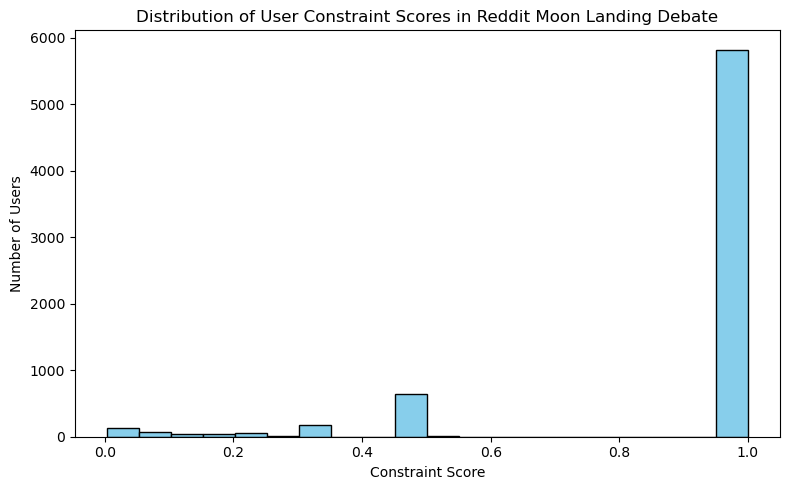

In [30]:
# Plot histogram of constraint scores
plt.figure(figsize=(8,5))
plt.hist(list(constraint_scores.values()), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Constraint Score')
plt.ylabel('Number of Users')
plt.title('Distribution of User Constraint Scores in Reddit Moon Landing Debate')
plt.tight_layout()
plt.show()

# Save scores to CSV
pd.DataFrame({'user': list(constraint_scores.keys()), 'constraint_score': list(constraint_scores.values())}).to_csv('user_constraint_scores.csv', index=False)